![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 6: Decision Trees EXERCISES


### Filipa Peleja <filipa.peleja@bts.tech>
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech>

## Classical Data Analysis (22-02-2022)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_6/Session_6_Classical_Data_Analysis_DT_EXERCISES.ipynb)

# Set Up

In [ ]:
pip install graphviz

In [ ]:
# Python ≥3.5 is required
# Let's assert that that is the case
import sys
assert sys.version_info >= (3, 5)

print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(sklearn.__version__)

0.22.2.post1


In [ ]:
# Common imports
import numpy as np
import os

In [ ]:
# This will make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# Where to save the figures (adjust this to your convenience)
PROJECT_ROOT_DIR = "/Users/lukeclarke/Desktop/masters_assignments/Data_Science_Modules/10_Decision_Trees"
CHAPTER_ID = "decision_tree_figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
# A function to save our figures

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## EXERCISE 1 - Decision Trees and Cross Validation

Follow the steps to find the best parameters on the Decision Tree classification over a Moon dataset. Try to play with the hyperparameters and reason your results with theory in hand.

### Generate a moons dataset

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [ ]:
import pandas as pd

df_X = pd.DataFrame(X)
df_X.head()

,0,1
0,0.940291,0.122306
1,0.124540,-0.424775
2,0.261988,0.508414
3,-0.495238,0.072589
4,-0.879413,0.549373


In [ ]:
df_y = pd.DataFrame(y)
df_y.head()

,0
0,1
1,0
2,0
3,0
4,0


In [ ]:
"""
X = ndarray of shape (n_samples, 2)
The generated samples.

y = ndarray of shape (n_samples,)
The integer labels (0 or 1) for class membership of each sample.
"""

'\nX = ndarray of shape (n_samples, 2)\nThe generated samples.\n\ny = ndarray of shape (n_samples,)\nThe integer labels (0 or 1) for class membership of each sample.\n'

### Split the train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Use grid search with Cross Validation
Try to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4], 
          'criterion':['entropy', 'gini']}

decision_tree = DecisionTreeClassifier()

grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=6)

grid_search_cv.fit(X, y)
          


Fitting 6 folds for each of 588 candidates, totalling 3528 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3528 out of 3528 | elapsed:  1.3min finished


GridSearchCV(cv=6, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

### Find the best estimator for GridSearch

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
grid_search_cv.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 20, 'min_samples_split': 2}

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=20, min_samples_split=2)

decision_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

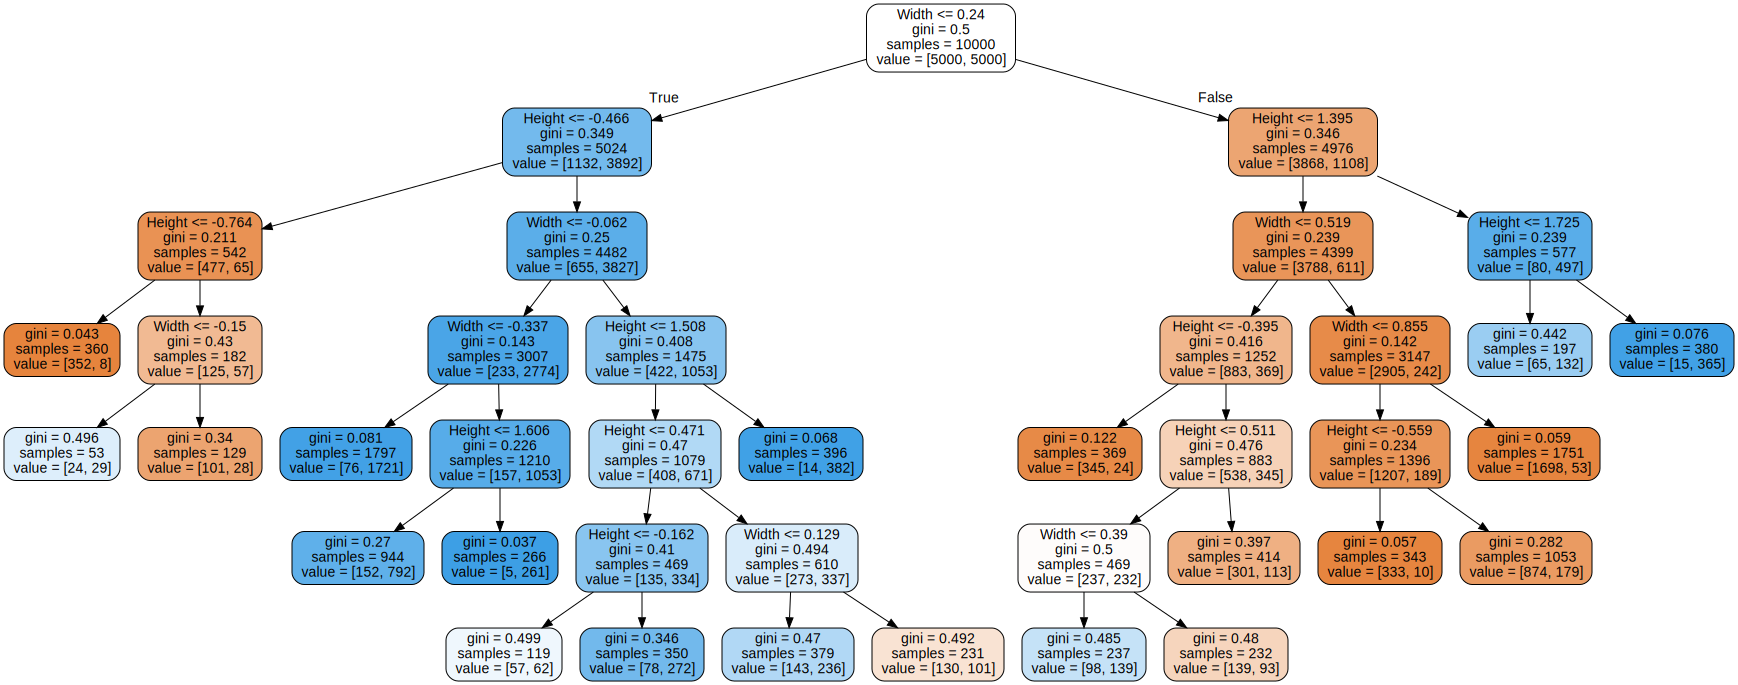

In [ ]:
# Visualize the Decision Tree (you need to have graphviz installed)
from graphviz import Source
from sklearn.tree import export_graphviz

# Call the export with Graphviz
export_graphviz(
        decision_tree,
        out_file=os.path.join(IMAGES_PATH, "moon_tree.dot"),
        feature_names=("Height", "Width"),
        rounded=True,
        filled=True
    )

# Load the file in the notebook
Source.from_file(os.path.join(IMAGES_PATH, "moon_tree.dot"))

### Visualize the split and the tree growth with the code above

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

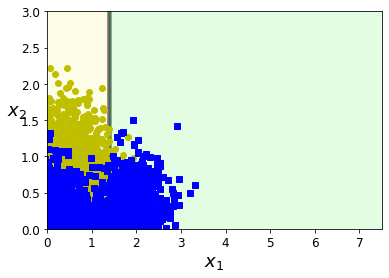

In [ ]:
plot_decision_boundary(clf=decision_tree, X=X_train, y=y_train, axes=[0, 7.5, 0, 3], iris=False)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = decision_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.8657575757575757

### Evaluate the accuracy with test
What did you get?

## EXERCISE 2 - My first random forest

You are already acquanted with the pitfalls of Decision Trees and might have an intutition of why Random Forest might be a good approach to address those pitfalls.

In this exercise you will build your own random forest from scratch. Be creative, make use of for loops or any programmnig tool that you like. Let's go:

## Part 1 - splitting the dataset to build a forest

Go on with the exercise above, use the same datraset. But this time generate 1000 subsets of the **training** dataset, with each containing 100 instances selected in a random manner.

You can code it by your own or use [Scikit-Learn ShuffleSplit class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

In [ ]:
# Do your splits here

from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, test_size=None, train_size=None, random_state=42)
rs.get_n_splits(X_train)

X_subsets = dict()
y_subsets = dict()

for i, indexes in enumerate(rs.split(X_train)):
    X_subsets[i] = X_train[indexes[0], :]
    y_subsets[i] = y_train[indexes[0]]



In [ ]:
X_subsets

{0: array([[-0.46517656,  0.34703638],
        [ 0.646313  , -0.62053283],
        [-0.71629827, -0.17753679],
        ...,
        [ 0.68796246,  0.2454908 ],
        [ 0.65791869,  0.75396246],
        [ 0.54083891,  0.80797645]]), 1: array([[ 0.00318777, -0.55728486],
        [ 0.38274651, -0.47328724],
        [ 0.09515955,  0.83504522],
        ...,
        [ 0.78096656,  1.03202141],
        [ 0.40796805,  0.75111667],
        [ 0.33576514,  1.41315884]]), 2: array([[ 1.5971092 ,  0.1753037 ],
        [ 1.91076446,  0.0965887 ],
        [-0.63693292,  0.97717262],
        ...,
        [-0.13195336,  0.58340757],
        [ 0.52608418, -0.34147895],
        [ 1.54038616, -0.21856957]]), 3: array([[-1.10203017,  0.60073672],
        [ 1.51555681,  0.37526408],
        [ 0.45881957, -0.13180298],
        ...,
        [-0.05036149, -0.32969371],
        [-1.17936096,  0.87715033],
        [-0.64331759,  0.83649321]]), 4: array([[-0.29636891,  0.18998528],
        [-0.7081063 , -0.4614

## Part 2 - Train each subset!

Use the best hyperparameters for the whole moons dataset that you found in the previous exercise. **Train one Decision Tree on each subset** (the subsets you just created in Part 1). 

Evaluate the 1000 Decision trees you trained over the test set. Create an empty list, and use the method you prefer to loop through each tree, evaluating over the test set and appending the results over the empty list. Once you have your list of accuracies, calculate the mean of all of them.

This will most likely perform worse than the Decision Tree you trained with the whole train dataset, achieving not more than 80%. 

Place your final mean accuracy below.

In [ ]:

decision_tree = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=20, min_samples_split=2)

scores = []
predictions = []
for i in X_subsets:
  decision_tree.fit(X_subsets[i], y_subsets[i])

  y_pred = decision_tree.predict(X_test)

  scores.append(accuracy_score(y_pred, y_test))
  predictions.append(y_pred)



In [ ]:
print("Max accuracy: {:.2f}%.".format(max(scores) * 100))
print("Min accuracy: {:.2f}%.".format(min(scores) * 100))
print("Average accuracy: {:.2f}%.".format(np.mean(scores) * 100))
print("Std of accuracy: {:.2f}.".format(np.std(scores) * 100))

Max accuracy: 86.55%.
Min accuracy: 85.03%.
Average accuracy: 85.95%.
Std of accuracy: 0.32.


## Part 3 - keeping the most frequent predictions

Now we will keep only the most frequent predictions.

For each test set **INSTANCE** or **SAMPLE**, generate the predictions of the 1000 Decision trees, and keep only the most frequent ones.

For instance:

* Test $y_0$ - prediction 1
* Test $y_1$ - prediction 1
* Test $y_2$ - prediction 0
* Test $y_3$ - prediction 1
* Test $y_4$ - prediction 1

You will keep prediction = 1, as it is the most frequent. You can use SciPy's mode() function to achieve this. 

Now we have a majority-vote predictions over the whole test set, having the most common predictions for each instance over the test set. Keep this value as an array with the same shape as y_test.

In [ ]:
# Do your most frequent predictions here

from scipy.stats import mode

mode(predictions, axis=None)

ModeResult(mode=array([0]), count=array([1692406]))

## Part 4 - let's see what happens for accuracy!

Use the array that you produced above with the most common predictions for each test instance. Compare it with the y_test set using the accuracy_score method.

Basically, you should do the following:

accuracy_score(my_y_test_dataset, my_most_common_predictions_over_y_dataset)

You might need to reshape your most common predictions array so it will be the same shape as the y_test.

You should get a slightly higher accuracy, maybe up to 1.5% higher. You just trained your first Random Forest classifier!!! Congratulations! Go an have a beer!

But first, comment on why do you think that you are getting a better accuracy. Reflect on Decision Trees instabilities and why creating a Randomized Forest of Decision Trees might yield better results.

In [ ]:
# Do your final accuracy score here

# Already completed this part above in part 3

## Place your reflections here:

Ok we have slightly improved our predictions but not by much so..does that mean that Random Forests are not much better than a single Decision Tree?
Well the truth is that this is a simplified example. Random Forests usually add a second layer of randomness by randomly limiting the features available at each split in the learning process. This avoids correlation between trees and results in better performance.
You could train a Sklearn’s RandomForestClassifier on this dataset and see if it outbeats our simple Random Forest. Please share your results!!
As final note, Random Forests implicitly address the problem of overfitting because it reduces the final variance of the model by using multiple samples of the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

"""
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the
max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
"""

random_forest = RandomForestClassifier(n_estimators = 1000, criterion="gini", max_depth=None, min_samples_split=2, max_leaf_nodes=20)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy_score(y_test, y_pred)



0.8678787878787879